__SVM__

In [1]:
# Подключение библиотек
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import seaborn as sns 
import pandas as pd 
from tqdm.notebook import tqdm
from scipy.special import softmax 
from scipy.spatial.distance import cdist 
import numpy as np 
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
#Генерируем выборку
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=40)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)

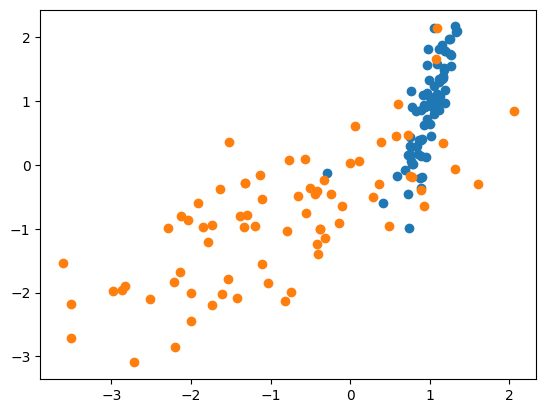

In [4]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
plt.show()    

In [5]:
#Обучаем линейную модель
model = SVC(kernel='linear')
_ = model.fit (X_train, Y_train)

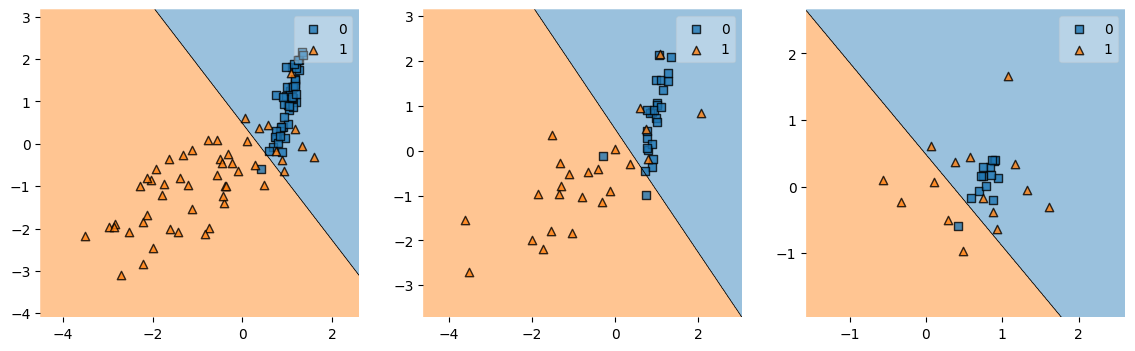

In [7]:
#Графически отображаем результаты
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0]) 
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__Раздичные ядра для SVM__

In [8]:
# Геренация новой выборки
np.random.seed(0)
m = 150 
n = 2
X = 10*np.random.randn(m, n)
Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)
X_train, X_test, Y_train, Ytest = train_test_split(X, Y, test_size=50, random_state=0)

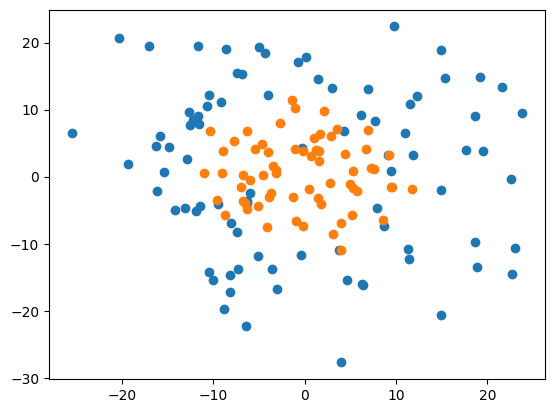

In [9]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
plt.show()    

In [10]:
#Обучение полиномиальной модели

model = SVC(kernel='poly')
_ = model.fit (X_train, Y_train)

#сигмоидная модель  model = SVC(kernel='sigmoid')

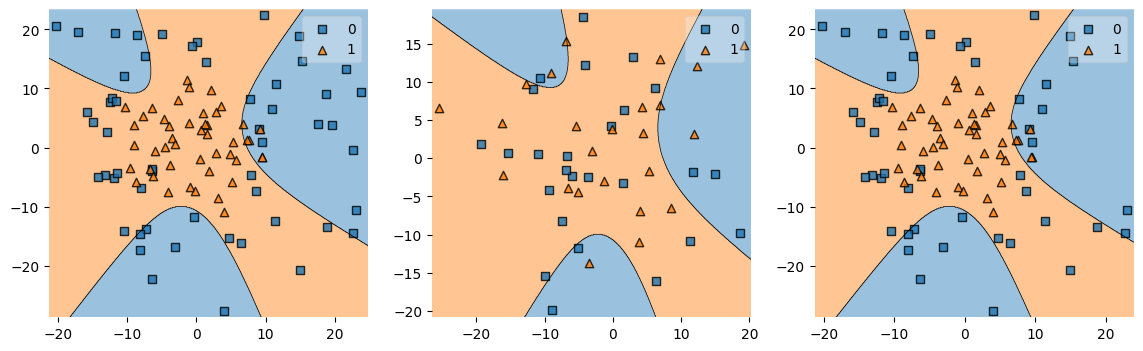

In [12]:
#Построение
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0]) 
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__Гауссово ядро с радиальной базовой функцией (RBF):  $ K(x_i,x_j)=exp(γ||x_i−x_j||^2)$__


In [13]:
#Обучаем линейную модель
model = SVC(kernel='rbf')
_ = model.fit (X_train, Y_train)

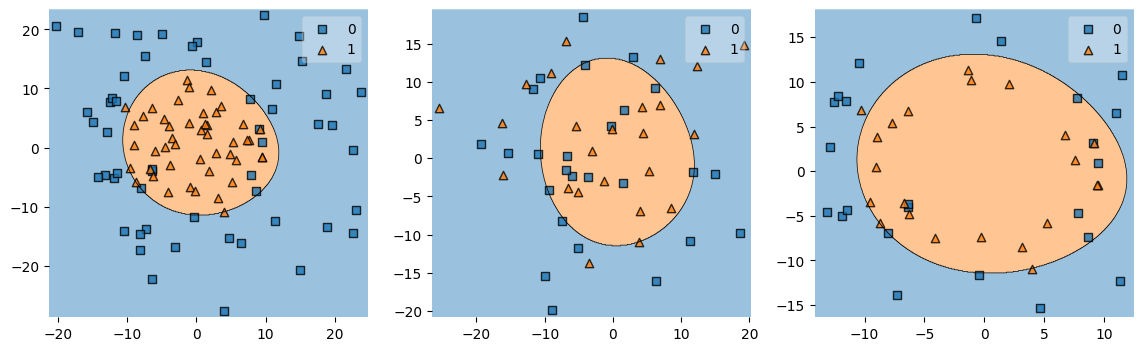

In [14]:
#Построение
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0]) 
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__SVM Regression__

In [15]:
np.random.seed(0)
l = 150
# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)
# Генерация признаков. Два признака х - линейные и np.sin(x) - через синус. 
X = np.array([x, np.sin(x)]).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)


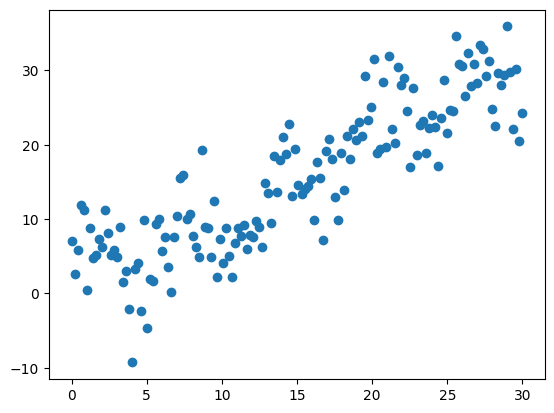

In [16]:
plt.plot(X[:, 0], Y, 'o')
plt.show()

In [17]:
#Ядро RBF
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

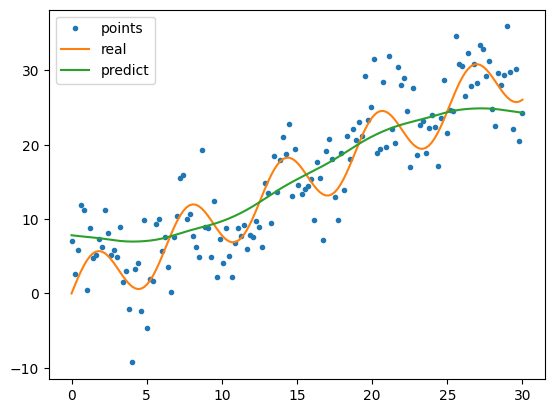

In [18]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real') 
plt.plot(x, model.predict(X), label='predict')
plt.legend(loc='best') 
plt.show()

In [19]:
#Ядро линейное
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

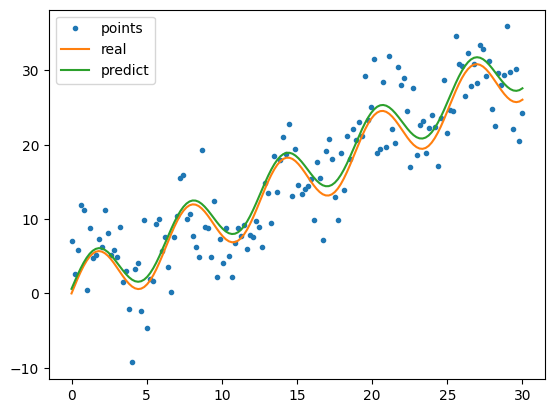

In [20]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real') 
plt.plot(x, model.predict(X), label='predict')
plt.legend(loc='best') 
plt.show()

In [21]:
np.random.seed(0)
l = 150
# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)
# Генерация признаков
X = np.array( [x]).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)


In [22]:
# Организация собственного ядра. Это то-же самое, что и X = np.array([x, np.sin(x)]).T используемое ранее.
def kernel(X1, X2):
    return np.sin(X1)@np.sin(X2).T + X1@X2.T

In [23]:
#Ядро линейное
model = SVR(kernel=kernel)
_ = model.fit(X_train, Y_train)

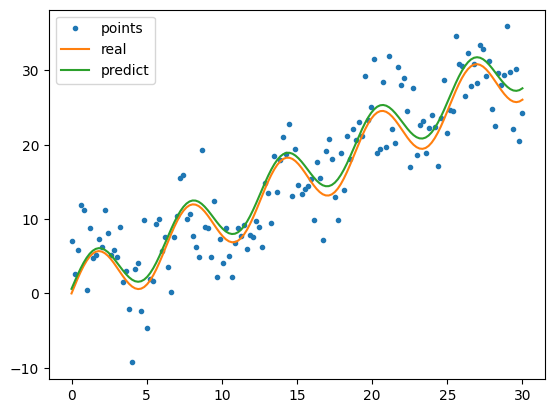

In [24]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real') 
plt.plot(x, model.predict(X), label='predict')
plt.legend(loc='best') 
plt.show()

__SVM Продолжение__

In [25]:
X, Y = make_classification(n_samples=2500, n_features=10, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1, 
                           random_state=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=500, 
                                                    random_state=0)

In [26]:
# RBF ядро
def kernel(X1, X2):
    return np.exp(-0.05*cdist(X1, X2)**2)

In [27]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train) 
print('Accuracy =', model.score(X_test, Y_test))

Accuracy = 0.916


__Нормализация__

In [28]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [29]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train) 
print('Accuracy =', model.score(X_test, Y_test))

Accuracy = 0.912


____Задание____ 

1. Классификация
Датасет сформирован следующей командой:
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)
Подобрать тип ядра и гиперпараметры для данной выборки. Произвести визуальное сравнение разных ядер и разных гиперпараметров. Сравнить точность для разных случаев.

2. Регрессия
Использовать датасет по гиперспектру кукурузы. 
Подобрать тип ядра и гиперпараметры для данной выборки. Произвести визуальное сравнение разных ядер и разных гиперпараметров. Сравнить точность для разных случаев.

3. Использовать любой из датасетов и любых два метода классификации или регрессии, изученные на предыдущих занятиях. Произвести сравнение 
работы этих методов и метода SVM. Кроме точности использовать и другие метрики качества алгоритма.


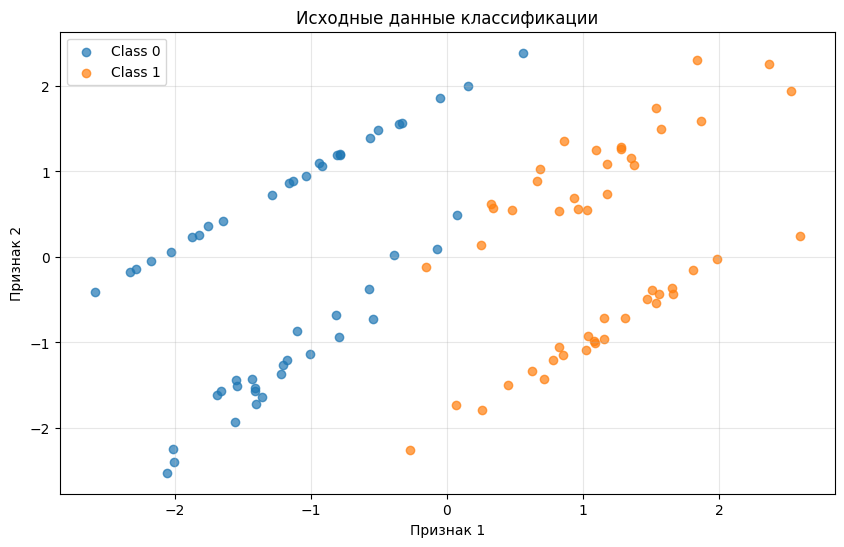

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

# Генерация данных
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=2, random_state=42)

# Разделение на train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Визуализация исходных данных
plt.figure(figsize=(10, 6))
for k in np.unique(Y):
    plt.scatter(X[Y==k, 0], X[Y==k, 1], label=f'Class {k}', alpha=0.7)
plt.title('Исходные данные классификации')
plt.legend()
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, alpha=0.3)
plt.show()

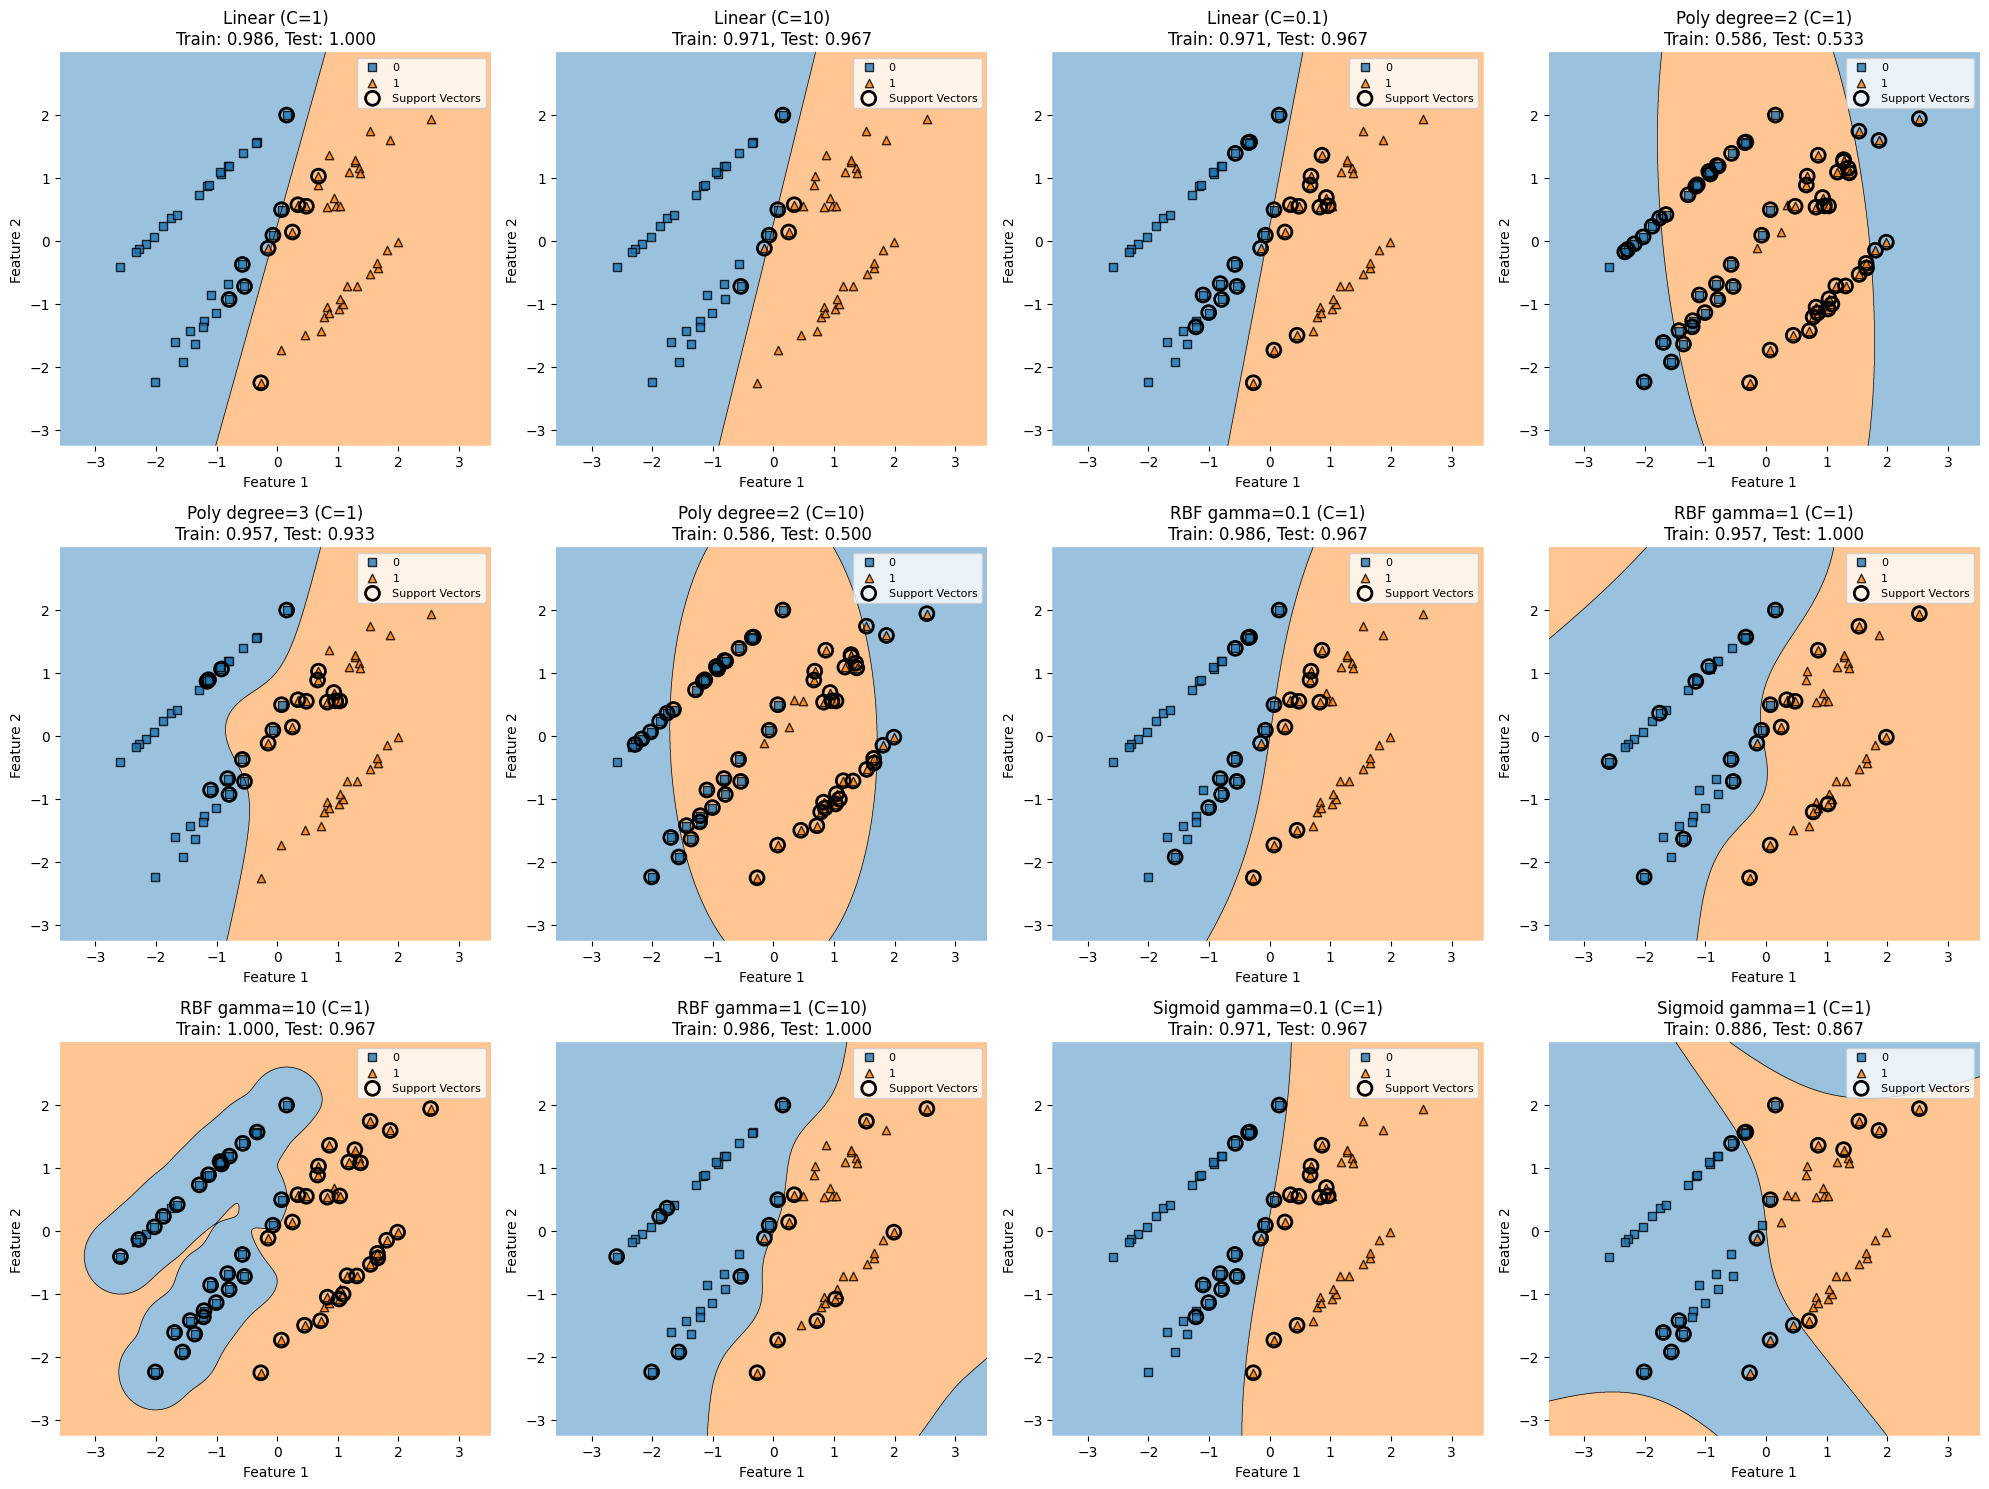


РЕЗУЛЬТАТЫ СРАВНЕНИЯ РАЗЛИЧНЫХ ЯДЕР И ГИПЕРПАРАМЕТРОВ
Модель                              Train Acc    Test Acc     #SV     
----------------------------------------------------------------------------------------------------
Linear (C=1)                        0.986        1.000        12      
RBF gamma=1 (C=1)                   0.957        1.000        24      
RBF gamma=1 (C=10)                  0.986        1.000        19      
Linear (C=10)                       0.971        0.967        7       
Linear (C=0.1)                      0.971        0.967        26      
RBF gamma=0.1 (C=1)                 0.986        0.967        23      
RBF gamma=10 (C=1)                  1.000        0.967        57      
Sigmoid gamma=0.1 (C=1)             0.971        0.967        26      
Poly degree=3 (C=1)                 0.957        0.933        21      
Sigmoid gamma=1 (C=1)               0.886        0.867        20      
Poly degree=2 (C=1)                 0.586        0.533        6

In [35]:
# Функция для обучения и визуализации SVM с разными параметрами
def evaluate_svm_kernels(X_train, X_test, Y_train, Y_test):
    """
    Исследует различные ядра и гиперпараметры SVM для задачи классификации
    """
    
    # Определяем различные комбинации ядер и параметров
    kernels_params = [
        # Линейное ядро
        {'name': 'Linear (C=1)', 'kernel': 'linear', 'C': 1, 'gamma': 'scale'},
        {'name': 'Linear (C=10)', 'kernel': 'linear', 'C': 10, 'gamma': 'scale'},
        {'name': 'Linear (C=0.1)', 'kernel': 'linear', 'C': 0.1, 'gamma': 'scale'},
        
        # Полиномиальное ядро
        {'name': 'Poly degree=2 (C=1)', 'kernel': 'poly', 'degree': 2, 'C': 1, 'gamma': 'scale'},
        {'name': 'Poly degree=3 (C=1)', 'kernel': 'poly', 'degree': 3, 'C': 1, 'gamma': 'scale'},
        {'name': 'Poly degree=2 (C=10)', 'kernel': 'poly', 'degree': 2, 'C': 10, 'gamma': 'scale'},
        
        # RBF ядро
        {'name': 'RBF gamma=0.1 (C=1)', 'kernel': 'rbf', 'gamma': 0.1, 'C': 1},
        {'name': 'RBF gamma=1 (C=1)', 'kernel': 'rbf', 'gamma': 1, 'C': 1},
        {'name': 'RBF gamma=10 (C=1)', 'kernel': 'rbf', 'gamma': 10, 'C': 1},
        {'name': 'RBF gamma=1 (C=10)', 'kernel': 'rbf', 'gamma': 1, 'C': 10},
        
        # Сигмоидное ядро
        {'name': 'Sigmoid gamma=0.1 (C=1)', 'kernel': 'sigmoid', 'gamma': 0.1, 'C': 1},
        {'name': 'Sigmoid gamma=1 (C=1)', 'kernel': 'sigmoid', 'gamma': 1, 'C': 1},
    ]
    
    results = []
    models = []
    
    # Создаем сетку для визуализации
    n_plots = len(kernels_params)
    n_cols = 4
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(20, 5 * n_rows))
    gs = gridspec.GridSpec(n_rows, n_cols, figure=fig)
    
    for idx, params in enumerate(kernels_params):
        # Извлекаем параметры
        kernel_type = params['kernel']
        C_val = params['C']
        gamma_val = params.get('gamma', 'scale')
        degree_val = params.get('degree', 3)
        
        # Создаем и обучаем модель
        if kernel_type == 'poly':
            model = SVC(kernel=kernel_type, C=C_val, gamma=gamma_val, degree=degree_val, random_state=42)
        else:
            model = SVC(kernel=kernel_type, C=C_val, gamma=gamma_val, random_state=42)
        
        model.fit(X_train, Y_train)
        models.append(model)
        
        # Оценка точности
        train_acc = accuracy_score(Y_train, model.predict(X_train))
        test_acc = accuracy_score(Y_test, model.predict(X_test))
        
        results.append({
            'name': params['name'],
            'model': model,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'n_support': len(model.support_)
        })
        
        # Визуализация
        ax = fig.add_subplot(gs[idx // n_cols, idx % n_cols])
        plot_decision_regions(X_train, Y_train, model, ax=ax, legend=0)
        
        # Отмечаем опорные векторы
        ax.scatter(X_train[model.support_, 0], X_train[model.support_, 1], 
                  s=100, linewidth=2, facecolors='none', edgecolors='k', 
                  label='Support Vectors')
        
        ax.set_title(f"{params['name']}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend(loc='upper right', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Вывод результатов в таблице
    print("\n" + "="*100)
    print("РЕЗУЛЬТАТЫ СРАВНЕНИЯ РАЗЛИЧНЫХ ЯДЕР И ГИПЕРПАРАМЕТРОВ")
    print("="*100)
    print(f"{'Модель':<35} {'Train Acc':<12} {'Test Acc':<12} {'#SV':<8}")
    print("-"*100)
    
    # Сортируем по тестовой точности
    sorted_results = sorted(results, key=lambda x: x['test_acc'], reverse=True)
    for r in sorted_results:
        print(f"{r['name']:<35} {r['train_acc']:<12.3f} {r['test_acc']:<12.3f} {r['n_support']:<8}")
    
    return sorted_results

# Запуск исследования
results = evaluate_svm_kernels(X_train, X_test, Y_train, Y_test)


ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШИХ МОДЕЛЕЙ

--- Linear (C=1) ---
Количество опорных векторов: 12
Доля опорных векторов: 17.14%
Train Accuracy: 0.9857
Test Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000

Classification Report (Test):
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        16
     Class 1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[16  0]
 [ 0 14]]

--- RBF gamma=1 (C=1) ---
Количество опорных векторов: 24
Доля опорных векторов: 34.29%
Train Accuracy: 0.9571
Test Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000

Classification Report (Test):
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        16
   

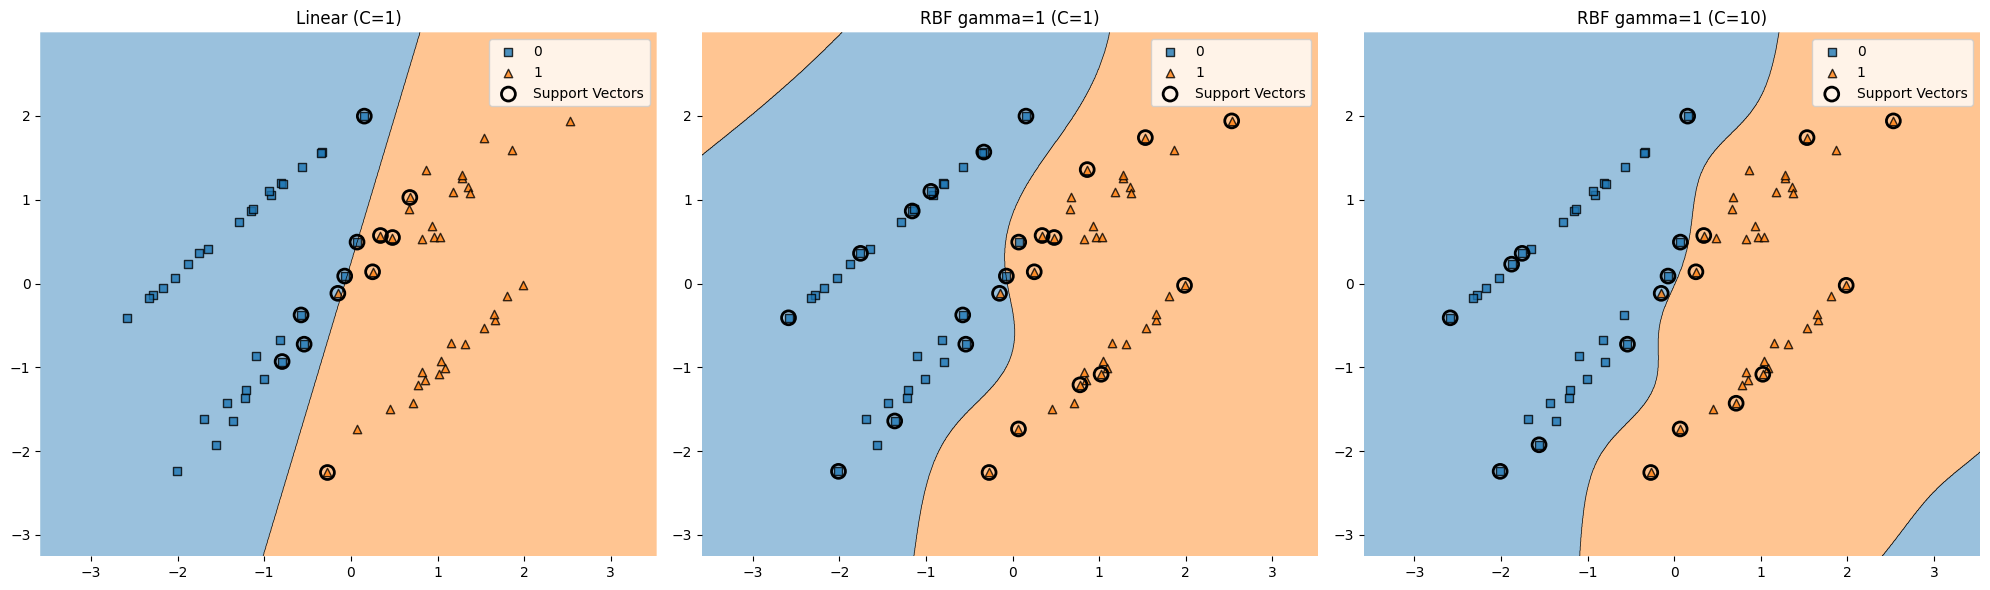

In [36]:
def detailed_analysis_best_models(X_train, X_test, Y_train, Y_test, results):
    """
    Детальный анализ нескольких лучших моделей
    """
    if results is None or len(results) == 0:
        print("Нет результатов для анализа!")
        return
    
    # Выбираем топ-3 лучшие модели
    best_models = results[:min(3, len(results))]
    
    print("\n" + "="*100)
    print("ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШИХ МОДЕЛЕЙ")
    print("="*100)
    
    # Создаем модели заново для детального анализа или используем сохраненные
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    for idx, model_info in enumerate(best_models):
        model = model_info['model']
        
        # Предсказания
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict(X_test)
        
        # Визуализация
        ax = axes[idx]
        plot_decision_regions(X_train, Y_train, model, ax=ax, legend=0)
        ax.scatter(X_train[model.support_, 0], X_train[model.support_, 1], 
                  s=100, linewidth=2, facecolors='none', edgecolors='k', 
                  label='Support Vectors')
        ax.set_title(f"{model_info['name']}")
        ax.legend(loc='upper right')
        
        # Детальная метрика
        print(f"\n--- {model_info['name']} ---")
        print(f"Количество опорных векторов: {len(model.support_)}")
        print(f"Доля опорных векторов: {len(model.support_)/len(X_train):.2%}")
        print(f"Train Accuracy: {accuracy_score(Y_train, Y_pred_train):.4f}")
        print(f"Test Accuracy: {accuracy_score(Y_test, Y_pred_test):.4f}")
        
        # Более детальные метрики
        precision = precision_score(Y_test, Y_pred_test, average='weighted')
        recall = recall_score(Y_test, Y_pred_test, average='weighted')
        f1 = f1_score(Y_test, Y_pred_test, average='weighted')
        
        print(f"Precision (weighted): {precision:.4f}")
        print(f"Recall (weighted): {recall:.4f}")
        print(f"F1-score (weighted): {f1:.4f}")
        
        print("\nClassification Report (Test):")
        print(classification_report(Y_test, Y_pred_test, target_names=['Class 0', 'Class 1']))
        
        # Матрица ошибок
        cm = confusion_matrix(Y_test, Y_pred_test)
        print(f"Confusion Matrix:\n{cm}")
    
    plt.tight_layout()
    plt.show()

# Проверяем, что results существует и вызываем функцию
if 'results' in locals() and results is not None:
    detailed_analysis_best_models(X_train, X_test, Y_train, Y_test, results)
else:
    print("Сначала выполните ячейку с evaluate_svm_kernels() для получения results")

In [37]:
from sklearn.model_selection import GridSearchCV

def grid_search_optimization(X_train, X_test, Y_train, Y_test):
    """
    Оптимизация гиперпараметров с помощью GridSearchCV
    """
    print("\n" + "="*100)
    print("ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ С GRID SEARCH")
    print("="*100)
    
    # Определяем сетку параметров для разных ядер
    param_grids = [
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10, 100]
        },
        {
            'kernel': ['poly'],
            'C': [0.1, 1, 10],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto', 0.1, 1]
        },
        {
            'kernel': ['rbf'],
            'C': [0.1, 1, 10, 100],
            'gamma': [0.01, 0.1, 1, 10, 'scale', 'auto']
        }
    ]
    
    best_models = []
    
    for param_grid in param_grids:
        print(f"\nПоиск для ядра {param_grid['kernel'][0] if isinstance(param_grid['kernel'], list) else param_grid['kernel']}...")
        grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, 
                                  scoring='accuracy', n_jobs=-1, verbose=0)
        grid_search.fit(X_train, Y_train)
        
        best_models.append({
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'test_score': grid_search.score(X_test, Y_test)
        })
        
        print(f"\nЛучшие параметры для {grid_search.best_params_['kernel']}:")
        print(f"  Параметры: {grid_search.best_params_}")
        print(f"  CV Accuracy: {grid_search.best_score_:.4f}")
        print(f"  Test Accuracy: {grid_search.score(X_test, Y_test):.4f}")
    
    # Находим абсолютно лучшую модель
    best_overall = max(best_models, key=lambda x: x['test_score'])
    print("\n" + "-"*60)
    print(f"ЛУЧШАЯ МОДЕЛЬ В ЦЕЛОМ:")
    print(f"  Параметры: {best_overall['best_params']}")
    print(f"  Test Accuracy: {best_overall['test_score']:.4f}")
    
    return best_models

best_models_grid = grid_search_optimization(X_train, X_test, Y_train, Y_test)


ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ С GRID SEARCH

Поиск для ядра linear...

Лучшие параметры для linear:
  Параметры: {'C': 0.1, 'kernel': 'linear'}
  CV Accuracy: 0.9714
  Test Accuracy: 0.9667

Поиск для ядра poly...

Лучшие параметры для poly:
  Параметры: {'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
  CV Accuracy: 0.9714
  Test Accuracy: 0.9667

Поиск для ядра rbf...

Лучшие параметры для rbf:
  Параметры: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  CV Accuracy: 0.9714
  Test Accuracy: 0.9667

------------------------------------------------------------
ЛУЧШАЯ МОДЕЛЬ В ЦЕЛОМ:
  Параметры: {'C': 0.1, 'kernel': 'linear'}
  Test Accuracy: 0.9667


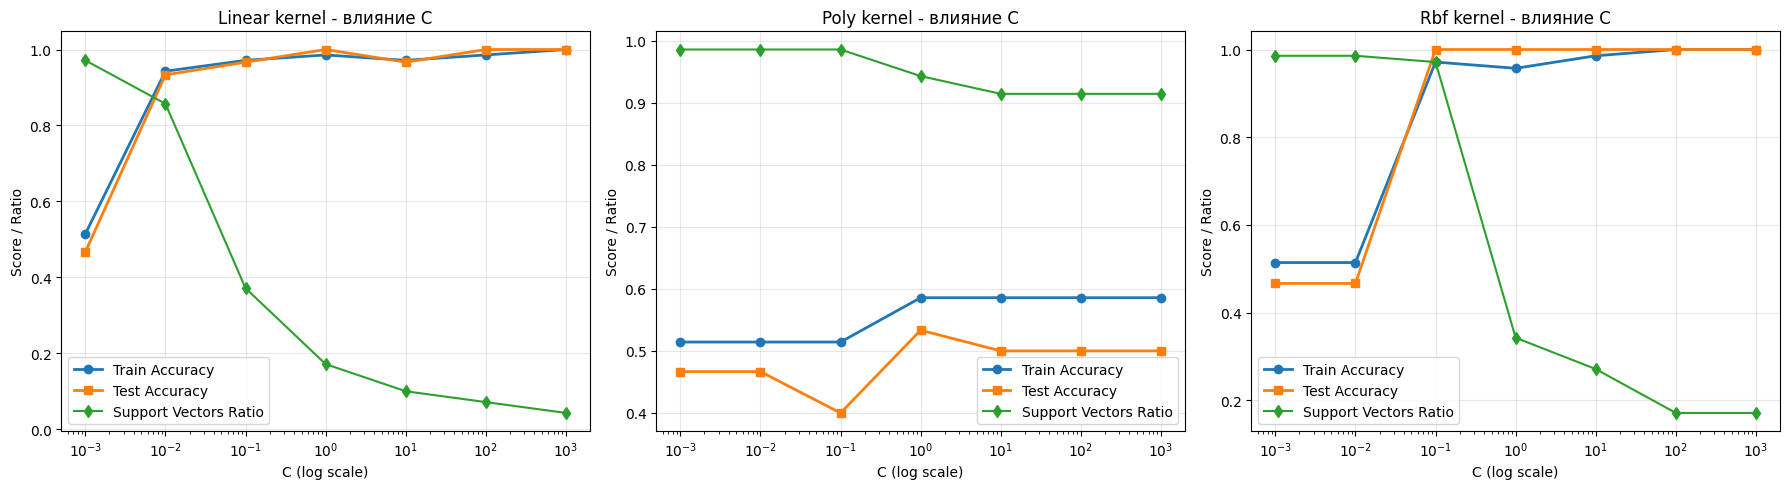

In [38]:
def analyze_c_parameter(X_train, X_test, Y_train, Y_test):
    """
    Анализ влияния параметра C для разных ядер
    """
    C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    kernels = ['linear', 'poly', 'rbf']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, kernel in enumerate(kernels):
        train_scores = []
        test_scores = []
        n_support = []
        
        for C in C_values:
            if kernel == 'poly':
                model = SVC(kernel=kernel, C=C, degree=2, gamma='scale', random_state=42)
            elif kernel == 'rbf':
                model = SVC(kernel=kernel, C=C, gamma=1, random_state=42)
            else:
                model = SVC(kernel=kernel, C=C, gamma='scale', random_state=42)
            
            model.fit(X_train, Y_train)
            train_scores.append(model.score(X_train, Y_train))
            test_scores.append(model.score(X_test, Y_test))
            n_support.append(len(model.support_))
        
        ax = axes[idx]
        ax.plot(C_values, train_scores, 'o-', label='Train Accuracy', linewidth=2)
        ax.plot(C_values, test_scores, 's-', label='Test Accuracy', linewidth=2)
        ax.plot(C_values, np.array(n_support)/len(X_train), 'd-', label='Support Vectors Ratio')
        
        ax.set_xscale('log')
        ax.set_xlabel('C (log scale)')
        ax.set_ylabel('Score / Ratio')
        ax.set_title(f'{kernel.capitalize()} kernel - влияние C')
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

analyze_c_parameter(X_train, X_test, Y_train, Y_test)

In [39]:
def create_comparison_table(results):
    """
    Создает подробную таблицу сравнения всех моделей
    """
    if results is None or len(results) == 0:
        print("Нет результатов для сравнения!")
        return
    
    print("\n" + "="*120)
    print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ")
    print("="*120)
    print(f"{'№':<3} {'Модель':<35} {'Train Acc':<12} {'Test Acc':<12} {'Diff':<10} {'#SV':<8} {'SV %':<8}")
    print("-"*120)
    
    for i, r in enumerate(results, 1):
        diff = r['train_acc'] - r['test_acc']
        sv_percent = r['n_support'] / len(X_train) * 100
        print(f"{i:<3} {r['name']:<35} {r['train_acc']:<12.3f} {r['test_acc']:<12.3f} "
              f"{diff:<10.3f} {r['n_support']:<8} {sv_percent:<8.1f}%")
    
    print("="*120)
    print("\nDiff = Train Accuracy - Test Accuracy (чем меньше, тем лучше)")
    print("SV% = Доля опорных векторов от обучающей выборки")

if 'results' in locals() and results is not None:
    create_comparison_table(results)
else:
    print("Сначала выполните ячейку с evaluate_svm_kernels() для получения results")


СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ
№   Модель                              Train Acc    Test Acc     Diff       #SV      SV %    
------------------------------------------------------------------------------------------------------------------------
1   Linear (C=1)                        0.986        1.000        -0.014     12       17.1    %
2   RBF gamma=1 (C=1)                   0.957        1.000        -0.043     24       34.3    %
3   RBF gamma=1 (C=10)                  0.986        1.000        -0.014     19       27.1    %
4   Linear (C=10)                       0.971        0.967        0.005      7        10.0    %
5   Linear (C=0.1)                      0.971        0.967        0.005      26       37.1    %
6   RBF gamma=0.1 (C=1)                 0.986        0.967        0.019      23       32.9    %
7   RBF gamma=10 (C=1)                  1.000        0.967        0.033      57       81.4    %
8   Sigmoid gamma=0.1 (C=1)             0.971        0.967        0.005     